# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Evaluation
Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [350]:
#importing libraries
import pandas as pd
import numpy as np

In [351]:
house_data=pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [352]:
house_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [353]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [354]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [355]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

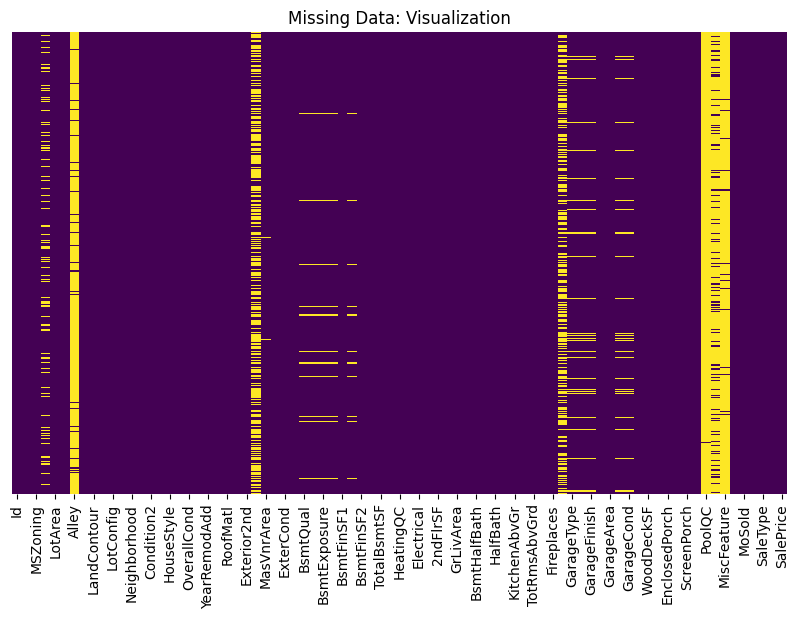

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(house_data.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Data: Visualization')
plt.show()


In [357]:
columns_to_drop=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']
house_data.drop(columns=columns_to_drop,inplace=True)

In [358]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [359]:
missing_values_columns=['LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',     
'Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]
# Get the data types for selected columns
data_types_selected = house_data[missing_values_columns].dtypes
data_types_selected

LotFrontage     float64
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

Categorical Values: Missing Values

In [360]:
house_data['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [361]:
most_frequent_category = house_data['Electrical'].mode()[0]
house_data['Electrical'].fillna(most_frequent_category, inplace=True)

In [362]:
house_data['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [363]:
#Replace missing values with "Unknown" Category
house_data['BsmtQual'].fillna('Unknown',inplace=True)

In [364]:
house_data['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [365]:
#Replace missing values with "Unknown" Category
house_data['BsmtCond'].fillna('Unknown',inplace=True)

In [366]:
house_data['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [367]:
#Replace missing values with "Unknown" Category
house_data['BsmtExposure'].fillna('Unknown',inplace=True)

In [368]:
house_data['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [369]:
#Replace missing values with "Unknown" Category
house_data['BsmtFinType1'].fillna('Unknown',inplace=True)

In [370]:
house_data['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [371]:
#Replace missing values with "Unknown" Category
house_data['BsmtFinType2'].fillna('Unknown',inplace=True)

In [372]:
house_data['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [373]:
#Replace missing values with "Unknown" Category
house_data['GarageType'].fillna('Unknown',inplace=True)

In [374]:
house_data['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [375]:
#Replace missing values with "Unknown" Category
house_data['GarageQual'].fillna('Unknown',inplace=True)

In [376]:
house_data['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [377]:
#Replace missing values with "Unknown" Category
house_data['GarageFinish'].fillna('Unknown',inplace=True)

In [378]:
house_data['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [379]:
#Replace missing values with "Unknown" Category
house_data['GarageCond'].fillna('Unknown',inplace=True)

In [380]:
house_data['BsmtExposure'].value_counts()

BsmtExposure
No         953
Av         221
Gd         134
Mn         114
Unknown     38
Name: count, dtype: int64

In [381]:
#Replace missing values with "Unknown" Category
house_data['BsmtExposure'].fillna('Unknown',inplace=True)

Numerical Values with missing values

In [382]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [383]:
house_data['LotFrontage'].mean()

70.04995836802665

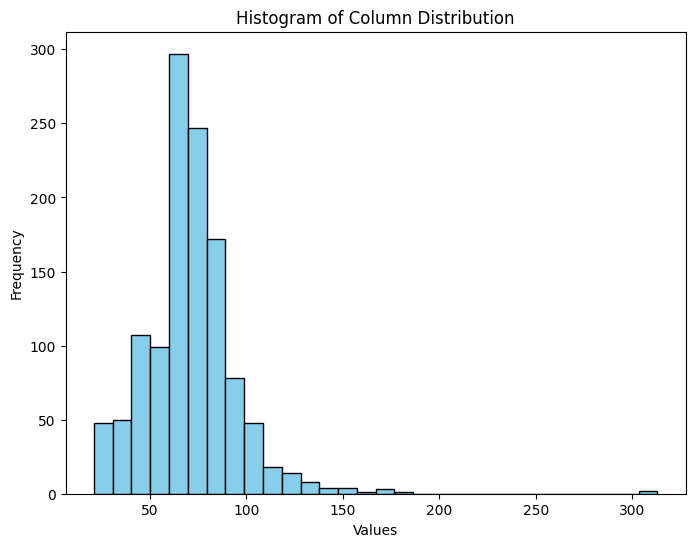

In [384]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(house_data['LotFrontage'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Distribution')
plt.show()


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


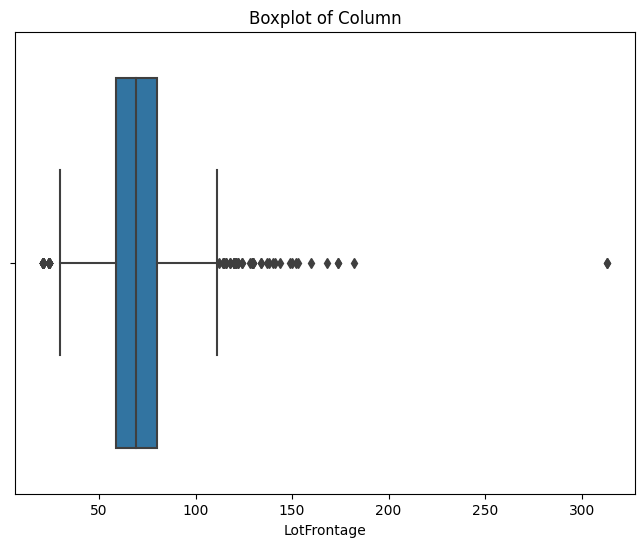

In [385]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=house_data['LotFrontage'])
plt.title('Boxplot of Column')
plt.show()


In [386]:
# Calculate the median of the column
median_value =house_data['LotFrontage'].median()

# Fill missing values in the column with the calculated median
house_data['LotFrontage'].fillna(median_value, inplace=True)


In [387]:
house_data['MasVnrArea'].mean()

103.68526170798899

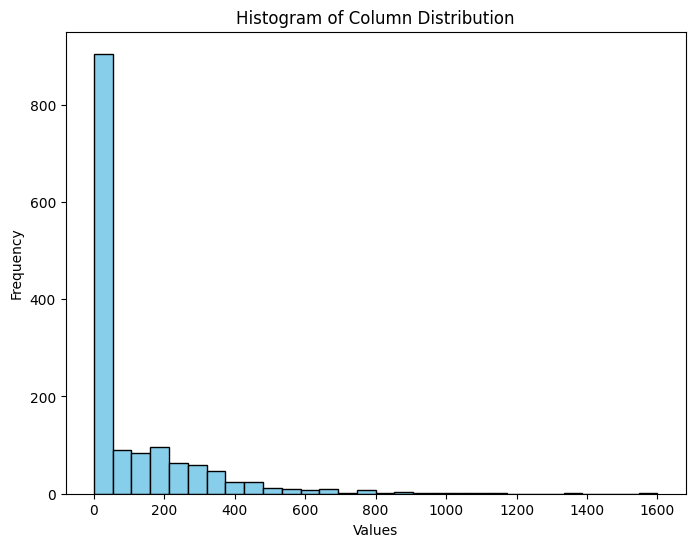

In [388]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(house_data['MasVnrArea'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Distribution')
plt.show()


In [389]:
# Calculate the median of the column
median_value =house_data['MasVnrArea'].median()

# Fill missing values in the column with the calculated median
house_data['MasVnrArea'].fillna(median_value, inplace=True)


In [390]:
house_data['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [391]:
#Impute with a Default or Sentinel Value
house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12072\4008274599.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1900-01-01 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


In [392]:
house_data['GarageYrBlt']=pd.to_datetime(house_data['GarageYrBlt'])
house_data['GarageYrBlt']=house_data['GarageYrBlt'].dt.year

In [393]:
house_data['GarageYrBlt']

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
1455    1970
1456    1970
1457    1970
1458    1970
1459    1970
Name: GarageYrBlt, Length: 1460, dtype: int32

In [394]:
house_data['GarageYrBlt']

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
1455    1970
1456    1970
1457    1970
1458    1970
1459    1970
Name: GarageYrBlt, Length: 1460, dtype: int32

In [395]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Series([], dtype: int64)

No Missing Values available

In [396]:
house_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Feature Engineering:Handling Categorical Data

In [397]:
#columns with categorical data
categorical_columns=house_data.select_dtypes(include=['object','category'])

In [398]:
categorical_columns.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [399]:
#The general zoning classification
#A	Agriculture
#C	Commercial
#FV	Floating Village Residential
#I	Industrial
#RH	Residential High Density
#RL	Residential Low Density
#RP	Residential Low Density Park 
#RM	Residential Medium Density
	
house_data['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [400]:
# Using pandas get_dummies() function to create dummy variables
dummy_variables=pd.get_dummies(house_data['MSZoning'],prefix='MSZoning',drop_first=True)
# Concatenating the dummy variables with the original DataFrame
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)
house_encode_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500,False,False,True,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500,False,False,True,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500,False,False,True,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000,False,False,True,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,8,2007,WD,Normal,175000,False,False,True,False
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2010,WD,Normal,210000,False,False,True,False
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2500,5,2010,WD,Normal,266500,False,False,True,False
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,4,2010,WD,Normal,142125,False,False,True,False


Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [401]:
house_data['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [402]:
dummy_variables=pd.get_dummies(house_data['Street'],prefix="Street",drop_first=True)
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [403]:
house_data['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [404]:
dummy_variables=pd.get_dummies(house_data['Neighborhood'],prefix="Neighborhood")
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [405]:
dummy_variables=pd.get_dummies(house_data['LandSlope'],prefix="LandSlope")
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [406]:
dummy_variables=pd.get_dummies(house_data['LotConfig'],prefix="LotConfig")
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [407]:
dummy_variables=pd.get_dummies(house_data['Utilities'],prefix="Utilities")
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [408]:
dummy_variables=pd.get_dummies(house_data['LandContour'],prefix="LandContour")
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [409]:
dummy_variables=pd.get_dummies(house_data['LotShape'],prefix="LotShape")
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [411]:
dummy_variables=pd.get_dummies(house_data['LotShape'],prefix="LotShape")
house_encode_data=pd.concat([house_data,dummy_variables],axis=1)